In [4]:
import os

import argparse
import wandb
import copy
from tqdm import tqdm
from statistics import mean, stdev
from sklearn import metrics

import torch

import PIL

from inverse_stable_diffusion import InversableStableDiffusionPipeline
from diffusers import DPMSolverMultistepScheduler, KandinskyPipeline, KandinskyPriorPipeline
import open_clip
from optim_utils import *
from io_utils import *

from IPython.display import display

from andmill_utils import get_pipe

import image_utils

import matplotlib.pyplot as plt


device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [5]:
models = [
    'kandinsky-community/kandinsky-2-1',
    'stabilityai/stable-diffusion-2-1-base',
    #'runwayml/stable-diffusion-v1-5',
    #'prompthero/openjourney',
    #'Fictiverse/Stable_Diffusion_Microscopic_model',
    #'hakurei/waifu-diffusion',
    
    #'dalle-mini/dalle-mega',
    #'Kandinski',
]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using a model of type xlm-roberta to instantiate a model of type M-CLIP. This is not supported for all configurations of models and can yield errors.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

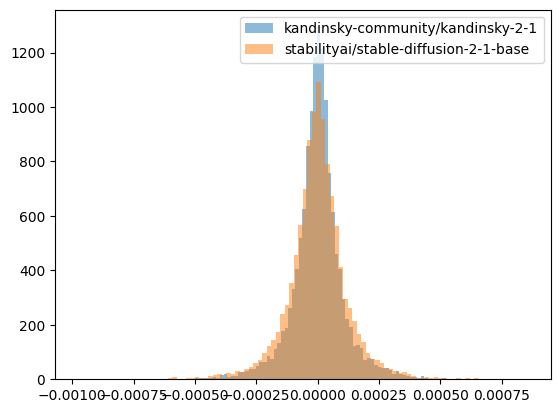

In [7]:
for model in models:
    pipe = get_pipe(model)
    data = pipe.unet.conv_in.weight.data.flatten().cpu().detach().numpy()
    data = data / np.abs(data).sum()
    plt.hist(data, bins=100, alpha=0.5, label=model)

plt.legend()
plt.show()